<a href="https://colab.research.google.com/github/paul3183/Pyspark_BigData_Udemy/blob/main/07_EJERCICIOS_Spark_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalar SDK Java 8

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Descargar Spark 3.4.3

!wget -q https://archive.apache.org/dist/spark/spark-3.4.3/spark-3.4.3-bin-hadoop3.tgz

# Descomprimir el archivo descargado de Spark

!tar xf spark-3.4.3-bin-hadoop3.tgz

# Establecer las variables de entorno

import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.3-bin-hadoop3"

# Instalar la librería findspark

!pip install -q findspark

# Instalar pyspark

!pip install -q pyspark

# verificar la instalación ###

import findspark

findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

spark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
# Los datos adjuntos a esta lección forman parte de la base de datos [NeurIPS
# 2020] Data Science for COVID-19 (DS4C) disponible en Kaggle. Estos datos hacen
# referencia a los casos de contagio de covid-19 en Corea del Sur. %%

In [3]:
# El archivo csv Case contiene los casos reportados y el archivo csv PatientInfo
# contiene la información de los pacientes.

In [4]:
# 1.- A partir del archivo csv Case, determine las tres ciudades con más casos confirmados de la enfermedad. La salida debe contener tres columnas: provincia, ciudad y casos confirmados. El resultado debe contener exactamente los tres nombre de ciudades con más casos confirmados ya que no se admiten otros valores.
casos = spark.read.option('header', 'true').option('inferSchema', 'true').csv('/content/data/Case.csv')
casos.printSchema()

root
 |--  case_id: integer (nullable = true)
 |-- province: string (nullable = true)
 |-- city: string (nullable = true)
 |-- group: boolean (nullable = true)
 |-- infection_case: string (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)



In [5]:
casos = casos.withColumnRenamed(' case_id', 'case_id')

In [6]:
casos.printSchema()

root
 |-- case_id: integer (nullable = true)
 |-- province: string (nullable = true)
 |-- city: string (nullable = true)
 |-- group: boolean (nullable = true)
 |-- infection_case: string (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)



In [7]:
casos.show()

+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|      139|37.538621|126.992652|
|1000002|   Seoul|      Gwanak-gu| true|             Richway|      119| 37.48208|126.901384|
|1000003|   Seoul|        Guro-gu| true| Guro-gu Call Center|       95|37.508163|126.884387|
|1000004|   Seoul|   Yangcheon-gu| true|Yangcheon Table T...|       43|37.546061|126.874209|
|1000005|   Seoul|      Dobong-gu| true|     Day Care Center|       43|37.679422|127.044374|
|1000006|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|
|1000007|   Seoul|from other city| true|SMR Newly Planted...|       36|        -|         -|
|1000008|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       17

In [8]:
from pyspark.sql.functions import col, desc

In [9]:
casos.orderBy(desc('confirmed')).show()

+-------+-----------------+---------------+-----+--------------------+---------+---------+----------+
|case_id|         province|           city|group|      infection_case|confirmed| latitude| longitude|
+-------+-----------------+---------------+-----+--------------------+---------+---------+----------+
|1200001|            Daegu|         Nam-gu| true|  Shincheonji Church|     4511| 35.84008|  128.5667|
|1200009|            Daegu|              -|false|contact with patient|      917|        -|         -|
|1200010|            Daegu|              -|false|                 etc|      747|        -|         -|
|6000001| Gyeongsangbuk-do|from other city| true|  Shincheonji Church|      566|        -|         -|
|2000020|      Gyeonggi-do|              -|false|     overseas inflow|      305|        -|         -|
|1000036|            Seoul|              -|false|     overseas inflow|      298|        -|         -|
|1200002|            Daegu|   Dalseong-gun| true|Second Mi-Ju Hosp...|      196|35

In [10]:
casos.filter((col('city') != '-') & (col('city') != 'from other city')).orderBy(desc('confirmed')).select('province', 'city', 'confirmed').show()

+-----------------+------------+---------+
|         province|        city|confirmed|
+-----------------+------------+---------+
|            Daegu|      Nam-gu|     4511|
|            Daegu|Dalseong-gun|      196|
|            Seoul|  Yongsan-gu|      139|
|            Daegu|      Seo-gu|      124|
|            Seoul|   Gwanak-gu|      119|
| Gyeongsangbuk-do|Cheongdo-gun|      119|
|Chungcheongnam-do|  Cheonan-si|      103|
|            Daegu|Dalseong-gun|      101|
|            Seoul|     Guro-gu|       95|
| Gyeongsangbuk-do| Bonghwa-gun|       68|
|      Gyeonggi-do| Seongnam-si|       67|
|      Gyeonggi-do|  Bucheon-si|       67|
| Gyeongsangbuk-do|Gyeongsan-si|       66|
|      Gyeonggi-do|Uijeongbu-si|       50|
|            Seoul|Yangcheon-gu|       43|
|            Seoul|   Dobong-gu|       43|
|            Seoul|     Guro-gu|       41|
| Gyeongsangbuk-do|  Yechun-gun|       40|
|            Busan|  Dongnae-gu|       39|
|            Daegu|     Dong-gu|       39|
+----------

In [11]:
# 2.- Cree un dataframe a partir del archivo csv PatientInfo. Asegúrese de que
# su dataframe no contenga pacientes duplicados.
pacientes_info = spark.read.option('header', 'true').option('inferSchema', 'true').csv('/content/data/PatientInfo.csv')

In [12]:
pacientes_info.printSchema()

root
 |-- patient_id: long (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- country: string (nullable = true)
 |-- province: string (nullable = true)
 |-- city: string (nullable = true)
 |-- infection_case: string (nullable = true)
 |-- infected_by: string (nullable = true)
 |-- contact_number: string (nullable = true)
 |-- symptom_onset_date: string (nullable = true)
 |-- confirmed_date: date (nullable = true)
 |-- released_date: date (nullable = true)
 |-- deceased_date: date (nullable = true)
 |-- state: string (nullable = true)



In [13]:
pacientes_info.show()

+----------+------+---+-------+--------+------------+--------------------+-----------+--------------+------------------+--------------+-------------+-------------+--------+
|patient_id|   sex|age|country|province|        city|      infection_case|infected_by|contact_number|symptom_onset_date|confirmed_date|released_date|deceased_date|   state|
+----------+------+---+-------+--------+------------+--------------------+-----------+--------------+------------------+--------------+-------------+-------------+--------+
|1000000001|  male|50s|  Korea|   Seoul|  Gangseo-gu|     overseas inflow|       null|            75|        2020-01-22|    2020-01-23|   2020-02-05|         null|released|
|1000000002|  male|30s|  Korea|   Seoul| Jungnang-gu|     overseas inflow|       null|            31|              null|    2020-01-30|   2020-03-02|         null|released|
|1000000003|  male|50s|  Korea|   Seoul|   Jongno-gu|contact with patient| 2002000001|            17|              null|    2020-01-30|

In [14]:
pacientes_info.select(col('patient_id')).count()

5165

In [15]:
pacientes_info.select(col('patient_id')).distinct().count()

5164

In [17]:
#eliminamos el paciente duplicado:
pacientes_info = pacientes_info.dropDuplicates(['patient_id'])

In [18]:
# a.- ¿Cuántos pacientes tienen informado por quién se contagiaron(columna
# infected_by)? Obtenga solo los pacientes que tengan informado por quién se
# contagiaron.
from pyspark.sql.functions import count

In [20]:
pacientes_info.select(count('infected_by').alias('conteo')).show()

+------+
|conteo|
+------+
|  1346|
+------+



In [21]:
#borraremos los nulos:
pacientes_info_contagios = pacientes_info.na.drop(subset = ['infected_by'])

In [22]:
pacientes_info_contagios.count()

1346

In [23]:
# b.- A partir de la salida del inciso anterior obtenga solo los pacientes
# femeninos. La salida no debe contener las columnas released_date y
# deceased_date.
pacientes_info_contagios.show()

+----------+------+---+-------+--------+------------+--------------------+-----------+--------------+------------------+--------------+-------------+-------------+--------+
|patient_id|   sex|age|country|province|        city|      infection_case|infected_by|contact_number|symptom_onset_date|confirmed_date|released_date|deceased_date|   state|
+----------+------+---+-------+--------+------------+--------------------+-----------+--------------+------------------+--------------+-------------+-------------+--------+
|1000000003|  male|50s|  Korea|   Seoul|   Jongno-gu|contact with patient| 2002000001|            17|              null|    2020-01-30|   2020-02-19|         null|released|
|1000000005|female|20s|  Korea|   Seoul| Seongbuk-gu|contact with patient| 1000000002|             2|              null|    2020-01-31|   2020-02-24|         null|released|
|1000000006|female|50s|  Korea|   Seoul|   Jongno-gu|contact with patient| 1000000003|            43|              null|    2020-01-31|

In [25]:
pacientes_info_contagios.filter((col('sex') == 'female') & (col('sex').isNotNull())).drop('released_date', 'deceased_date').show()

+----------+------+---+-------+--------+-------------+--------------------+-----------+--------------+------------------+--------------+--------+
|patient_id|   sex|age|country|province|         city|      infection_case|infected_by|contact_number|symptom_onset_date|confirmed_date|   state|
+----------+------+---+-------+--------+-------------+--------------------+-----------+--------------+------------------+--------------+--------+
|1000000005|female|20s|  Korea|   Seoul|  Seongbuk-gu|contact with patient| 1000000002|             2|              null|    2020-01-31|released|
|1000000006|female|50s|  Korea|   Seoul|    Jongno-gu|contact with patient| 1000000003|            43|              null|    2020-01-31|released|
|1000000010|female|60s|  Korea|   Seoul|  Seongbuk-gu|contact with patient| 1000000003|             6|              null|    2020-02-05|released|
|1000000014|female|60s|  Korea|   Seoul|    Jongno-gu|contact with patient| 1000000013|            27|        2020-02-06|   

In [ ]:
# c.- Establezca el número de particiones del dataframe resultante del inciso
# anterior en dos. Escriba el dataframe resultante en un archivo parquet. La
# salida debe estar particionada por la provincia y el modo de escritura debe
# ser overwrite.

In [26]:
final_df = pacientes_info_contagios.filter((col('sex') == 'female') & (col('sex').isNotNull())).drop('released_date', 'deceased_date')

In [27]:
final_df.coalesce(2).write.partitionBy('province').mode('overwrite').parquet('/content/data/salida')

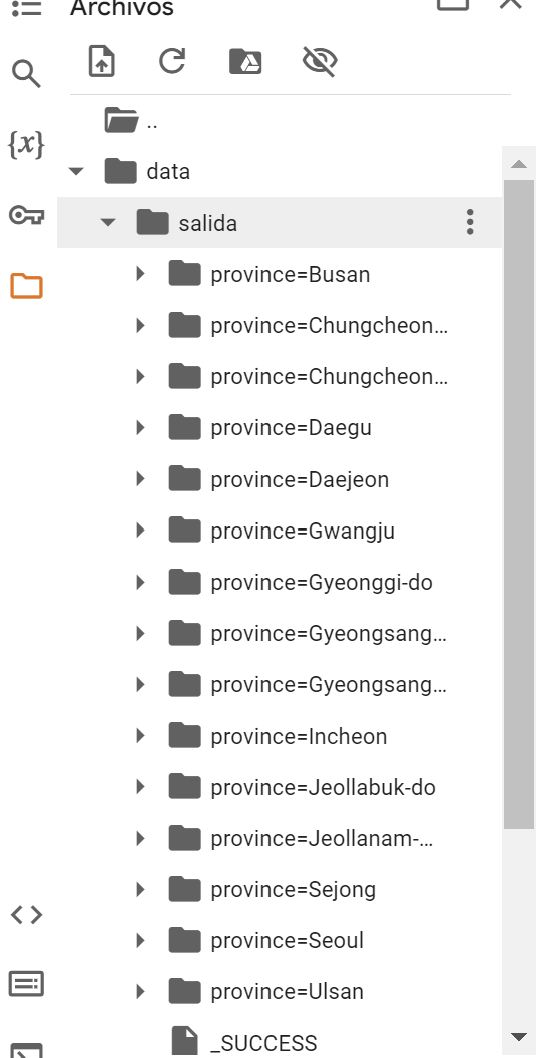
